<a href="https://colab.research.google.com/github/AnaCampos8898998/Machine_Learning/blob/main/Proyecto_Uno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Machine Learning**

---
Proyecto datos estructurados


---
2023

---
Elaborado: Ana Maria Campos Mora

---
Fecha:





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. IMPORT LIBRARIES**

In [ ]:
# seed our random values for reproducible code

import numpy as np
np.random.seed(0)
import random
random.seed(0)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.pipeline import Pipeline
import time

In [ ]:
import pandas as pd

cardio_train = pd.read_csv('/content/drive/MyDrive/Machine Learning/cardio_train.csv')
cardio_train_c = cardio_train.copy() # A copy of the dataset

# **1. EXPLORATORY DATA ANALYSIS**

In [ ]:
cardio_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0


In [ ]:
cardio_train.shape

(70000, 13)

In [ ]:
cardio_train.isnull().mean()  # percent of missing data in each column
# Diagnosis (output) has no missing data.  InitialPCRDiagnosis is the feature with the most empty cells.

id             0.0
age            0.0
gender         0.0
height         0.0
weight         0.0
ap_hi          0.0
ap_lo          0.0
cholesterol    0.0
gluc           0.0
smoke          0.0
alco           0.0
active         0.0
cardio         0.0
dtype: float64

In [ ]:
cardio_train['cardio'].value_counts(normalize=True)  # percent breakdown of response variable
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html#pandas-dataframe-value-counts


0    0.5003
1    0.4997
Name: cardio, dtype: float64

Esto quiere decir que el 50% no tiene problemas cardiovasculares y el 49% si tiene problemas cardiovasculares

In [ ]:
cardio_train.info() # Dtype corresponds to the type of data
# Object is qualitative data.
# float64 is quantitative data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           70000 non-null  int64
 1   age          70000 non-null  int64
 2   gender       70000 non-null  int64
 3   height       70000 non-null  int64
 4   weight       70000 non-null  int64
 5   ap_hi        70000 non-null  int64
 6   ap_lo        70000 non-null  int64
 7   cholesterol  70000 non-null  int64
 8   gluc         70000 non-null  int64
 9   smoke        70000 non-null  int64
 10  alco         70000 non-null  int64
 11  active       70000 non-null  int64
 12  cardio       70000 non-null  int64
dtypes: int64(13)
memory usage: 6.9 MB


# **3. FEATURE IMPROVEMENT**

As we saw previously, we have a lot of missing values in our feature columns. In fact, every single feature has missing data that we will need to fill in to use a vast majority of ML models. We will see two forms of feature improvement in this case study:

---
*Imputing data*—This is the most common way to improve features. We will look
at a few ways to impute data, or fill in missing values, for both qualitative and quantitative data.

---
*Value normalizing*—This involves mapping values from a perceived value to a
hard value. For our dataset, we will see that the binary features are conveying
values through strings like Yes and No. We will want to map those to being True
and False values, so our ML model can use them.


---




**IMPUTING MISSING QUANTITATIVE DATA- No aplica para mi caso**



1.  **We can remove observations** and rows that have missing data in them, but this
can be a great way to **throw out a lot of useful data**.
2.  **We can impute the values that are missing**, so we don’t have to throw away the entire observation or row.



In [ ]:
numeric_types = ['float16', 'float32', 'float64', 'int16', 'int32', 'int64']  # the numeric types in Pandas

numerical_columns = cardio_train.select_dtypes(include=numeric_types).columns.tolist() # Put in a list the features with numerical format.

numerical_columns

['id',
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

In [ ]:
cardio_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0


In [ ]:
pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 3.9 MB/s eta 0:00:00


Counting values of qualitative features

In [ ]:
numerical_types = ['O'] # The "object" type in pandas
numerical_columns = cardio_train.select_dtypes(include=numerical_types).columns.tolist() # List of numerical features
numerical_columns.remove('cardio') # Remove the output
for numerical_column in numerical_columns:
  print('=======')
  print(numerical_column)
  print('=======')
  print(cardio_train[numerical_column].value_counts(dropna=False))


ValueError: ignored

It looks like all of our categorical columns are binary except for RiskFactors, which looks to be a pretty dirty, comma-separated list of factors. Before we attempt to deal with RiskFactors, let’s clean up our binary features

**Eliminar columna de ID no es importante**


In [ ]:
cardio_train.drop(['id'], axis=1, inplace=True)

In [ ]:
cardio_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,NEW_AGE,new_age
0,50,2,168,62,110,80,1,1,0,0,1,0,Adulto,Adulto
1,55,1,156,85,140,90,3,1,0,0,1,1,Adulto,Adulto
2,51,1,165,64,130,70,3,1,0,0,0,1,Adulto,Adulto
3,48,2,169,82,150,100,1,1,0,0,1,1,Adulto,Adulto
4,47,1,156,56,100,60,1,1,0,0,0,0,Adulto,Adulto


**1.Pasar edad de dias a años**

In [ ]:
cardio_train['age']=cardio_train['age']//365

In [ ]:
cardio_train['age'].head()

0    50
1    55
2    51
3    48
4    47
Name: age, dtype: int64

**2.Asignar rangos de edades**

In [ ]:
cardio_train.loc[(cardio_train["age"] < 18), "new_age"] = "Joven"
cardio_train.loc[(cardio_train["age"] > 18) & (cardio_train["age"] < 56), "new_age"] = "Adulto"
cardio_train.loc[(cardio_train["age"] >= 56), "new_age"] = "Viejo"


In [ ]:
cardio_train['age'].head()

0    50
1    55
2    51
3    48
4    47
Name: age, dtype: int64

In [ ]:
cardio_train.drop(['NEW_AGE'], axis=1, inplace=True)

In [ ]:
cardio_train['new_age'].head(20)

0     Adulto
1     Adulto
2     Adulto
3     Adulto
4     Adulto
5      Viejo
6      Viejo
7      Viejo
8     Adulto
9     Adulto
10     Viejo
11    Adulto
12    Adulto
13    Adulto
14    Adulto
15    Adulto
16     Viejo
17    Adulto
18    Adulto
19     Viejo
Name: new_age, dtype: object

In [ ]:
cardio_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,new_age
0,50,2,168,62,110,80,1,1,0,0,1,0,Adulto
1,55,1,156,85,140,90,3,1,0,0,1,1,Adulto
2,51,1,165,64,130,70,3,1,0,0,0,1,Adulto
3,48,2,169,82,150,100,1,1,0,0,1,1,Adulto
4,47,1,156,56,100,60,1,1,0,0,0,0,Adulto


**Crear columna de IBM:Indice de masa muscular**
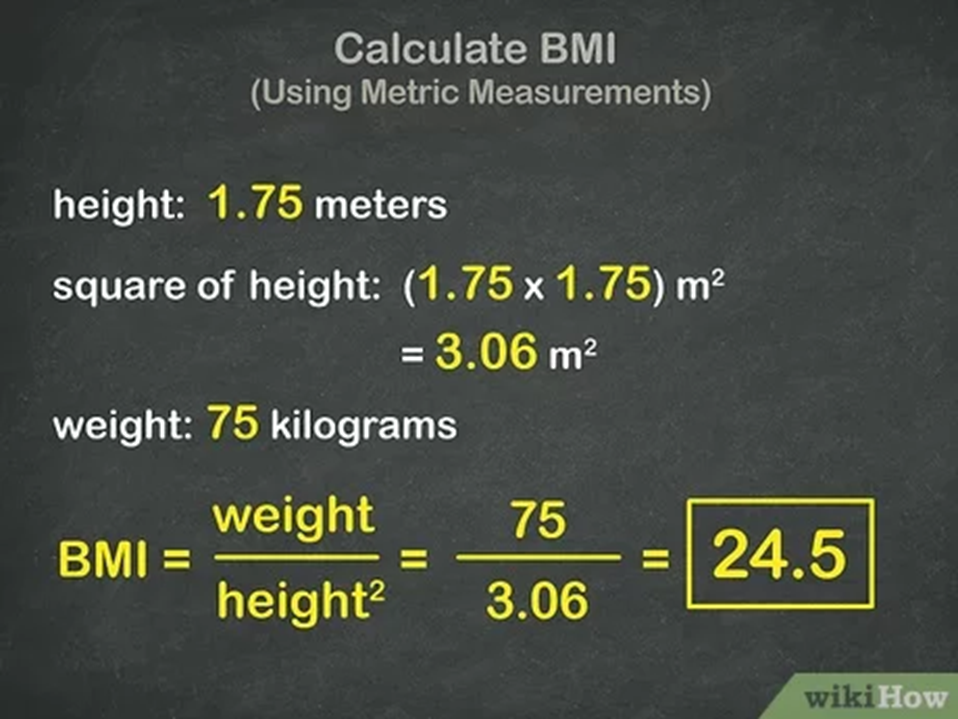

In [ ]:
cardio_train['BMI']=cardio_train['weight']/(cardio_train['height']/100)**2

In [ ]:
cardio_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,new_age,BMI
0,50,2,168,62,110,80,1,1,0,0,1,0,Adulto,21.967120
1,55,1,156,85,140,90,3,1,0,0,1,1,Adulto,34.927679
2,51,1,165,64,130,70,3,1,0,0,0,1,Adulto,23.507805
3,48,2,169,82,150,100,1,1,0,0,1,1,Adulto,28.710479
4,47,1,156,56,100,60,1,1,0,0,0,0,Adulto,23.011177


**Agregar Rangos de BMI**
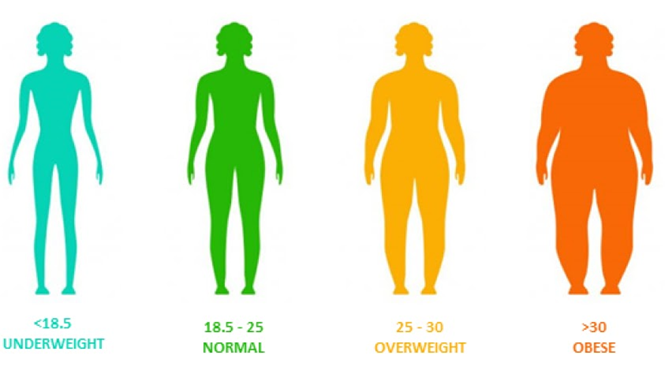

In [ ]:
cardio_train.loc[(cardio_train["BMI"] < 18.5), "NEW_BMI"] = "Bajo"
cardio_train.loc[(cardio_train["BMI"] >= 18.5) & (cardio_train["BMI"] <= 24.99) ,"NEW_BMI"] = "Normal"
cardio_train.loc[(cardio_train["BMI"] >= 25) & (cardio_train["BMI"] <= 29.99) ,"NEW_BMI"]= "Excesopeso"
cardio_train.loc[(cardio_train["BMI"] >= 30), "NEW_BMI"] = "Obeso"


In [ ]:
cardio_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,new_age,BMI,NEW_BMI
0,50,2,168,62,110,80,1,1,0,0,1,0,Adulto,21.967120,Normal
1,55,1,156,85,140,90,3,1,0,0,1,1,Adulto,34.927679,Obeso
2,51,1,165,64,130,70,3,1,0,0,0,1,Adulto,23.507805,Normal
3,48,2,169,82,150,100,1,1,0,0,1,1,Adulto,28.710479,Excesopeso
4,47,1,156,56,100,60,1,1,0,0,0,0,Adulto,23.011177,Normal


**Cambiar columna de gender**

In [ ]:
cardio_train['gender'] = cardio_train['gender'].replace({1: 'Female', 2: 'Male'})

In [ ]:
cardio_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,new_age,BMI,NEW_BMI
0,50,Male,168,62,110,80,1,1,0,0,1,0,Adulto,21.967120,Normal
1,55,Female,156,85,140,90,3,1,0,0,1,1,Adulto,34.927679,Obeso
2,51,Female,165,64,130,70,3,1,0,0,0,1,Adulto,23.507805,Normal
3,48,Male,169,82,150,100,1,1,0,0,1,1,Adulto,28.710479,Excesopeso
4,47,Female,156,56,100,60,1,1,0,0,0,0,Adulto,23.011177,Normal


In [ ]:
cardio_train.drop(['Female'], axis=1, inplace=True)

In [ ]:
cardio_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,new_age,BMI,NEW_BMI
0,50,Male,168,62,110,80,1,1,0,0,1,0,Adulto,21.967120,Normal
1,55,Female,156,85,140,90,3,1,0,0,1,1,Adulto,34.927679,Obeso
2,51,Female,165,64,130,70,3,1,0,0,0,1,Adulto,23.507805,Normal
3,48,Male,169,82,150,100,1,1,0,0,1,1,Adulto,28.710479,Excesopeso
4,47,Female,156,56,100,60,1,1,0,0,0,0,Adulto,23.011177,Normal


In [ ]:
cardio_train['Female'] = cardio_train['gender'] == 'F' # Turn our Sex column into a binary column. If Female, the result is True; otherwise is False.

In [ ]:
cardio_train['gender'].head()

0      Male
1    Female
2    Female
3      Male
4    Female
Name: gender, dtype: object

In [ ]:
cardio_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,new_age,BMI,NEW_BMI
0,50,Male,168,62,110,80,1,1,0,0,1,0,Adulto,21.967120,Normal
1,55,Female,156,85,140,90,3,1,0,0,1,1,Adulto,34.927679,Obeso
2,51,Female,165,64,130,70,3,1,0,0,0,1,Adulto,23.507805,Normal
3,48,Male,169,82,150,100,1,1,0,0,1,1,Adulto,28.710479,Excesopeso
4,47,Female,156,56,100,60,1,1,0,0,0,0,Adulto,23.011177,Normal


In [ ]:
cardio_train.drop(['Female'], axis=1, inplace=True)

In [ ]:
cardio_train.head(1)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,new_age,BMI,NEW_BMI
0,50,Male,168,62,110,80,1,1,0,0,1,0,Adulto,21.96712,Normal


In [ ]:
print(cardio_train['ap_hi'].max())


16020


In [ ]:
print(cardio_train['ap_lo'].max())

11000


**Rangos para la presión**
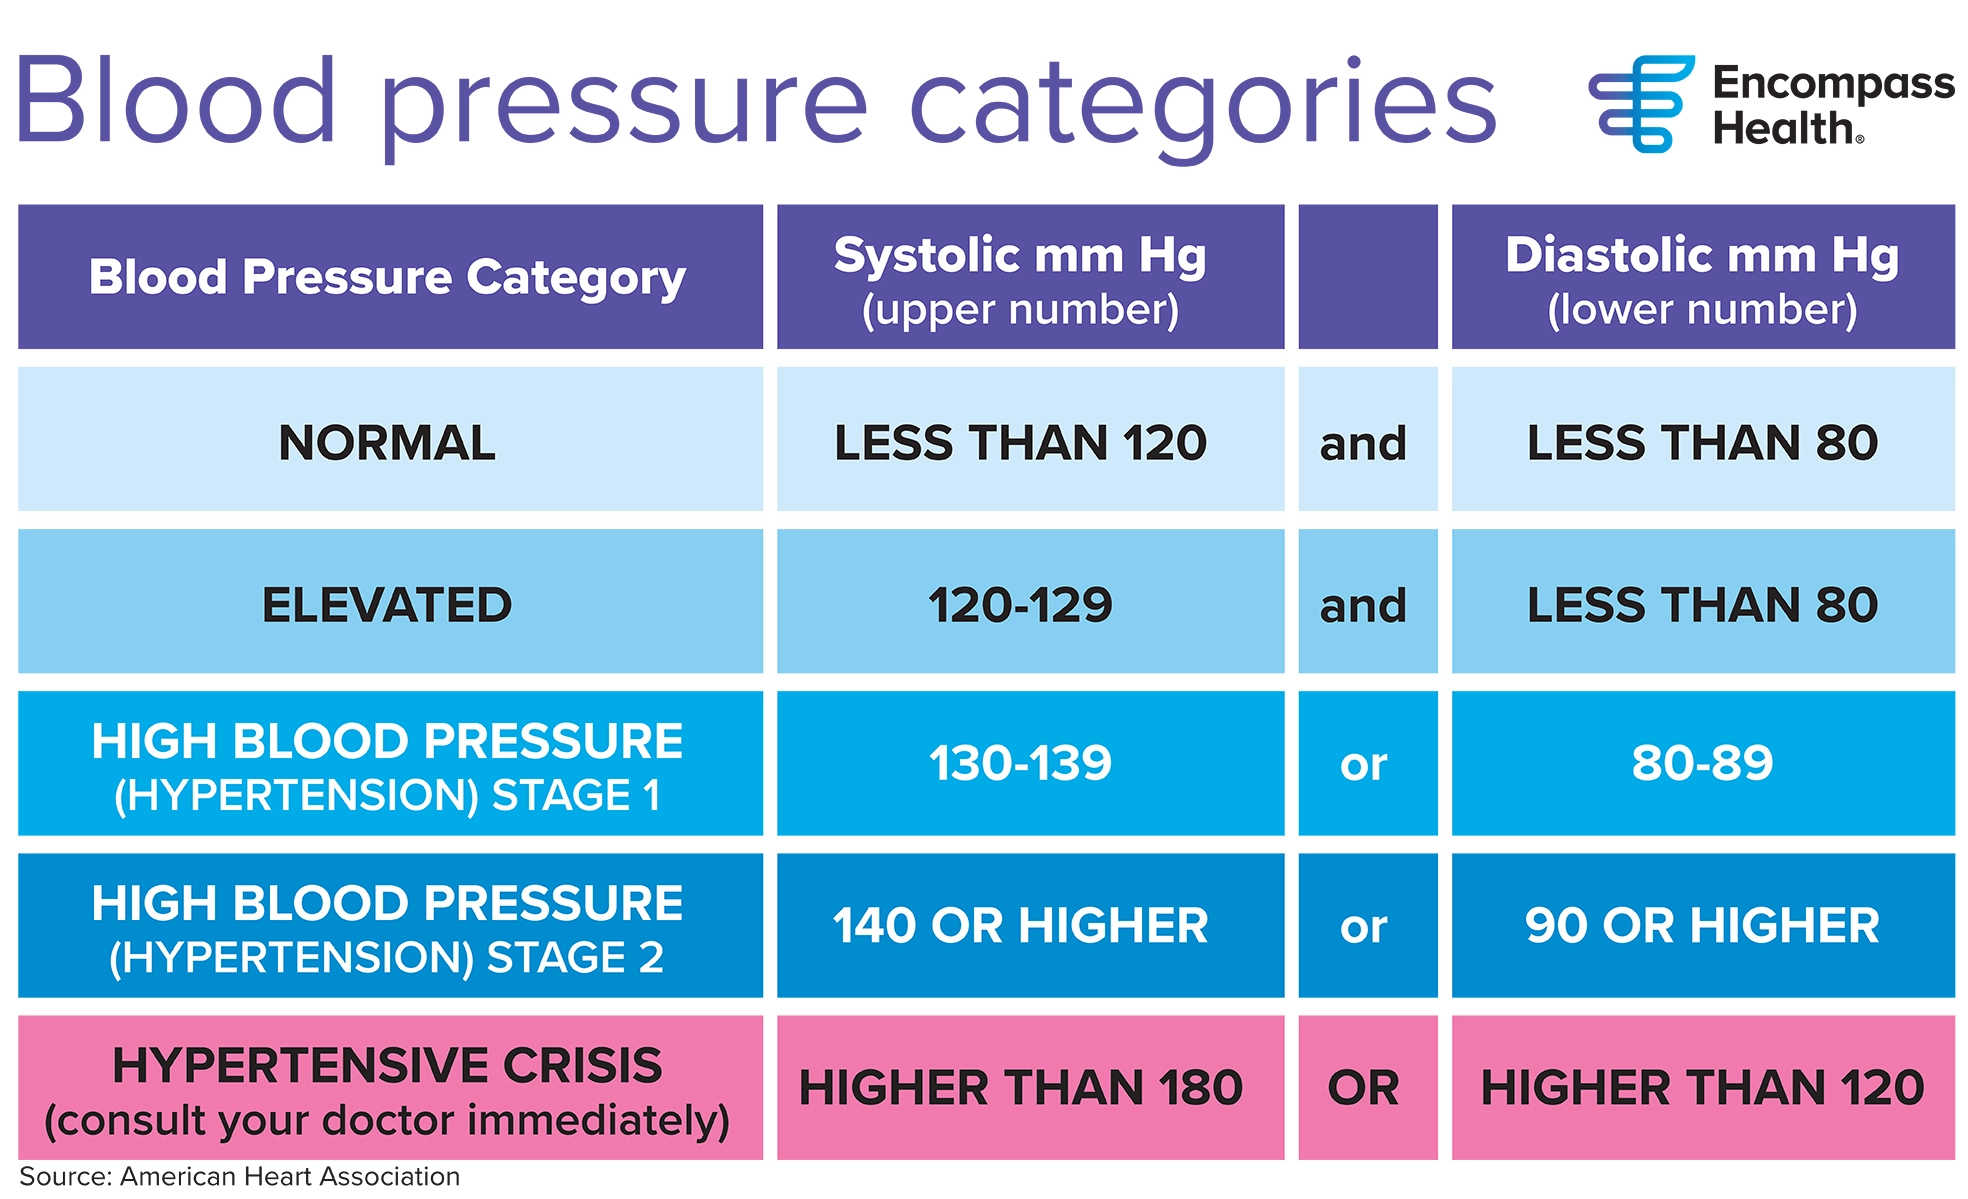

In [ ]:
 #Definir los rangos máximos y mínimos
ap_hi_max = 139  # Valor máximo para ap_hi en Hypertension Stage 1
ap_lo_max = 89   # Valor máximo para ap_lo en Hypertension Stage 1

# Filtrar el DataFrame para eliminar valores atípicos
cardio_train_cleaned = cardio_train[(cardio_train['ap_hi'] >= 0) & (cardio_train['ap_hi'] <= ap_hi_max) &
                (cardio_train['ap_lo'] >= 0) & (cardio_train['ap_lo'] <= ap_lo_max)]

# Cardio_cleaned ahora contiene solo las filas que cumplen con los rangos establecidos
#----- Me falta definir los rangos---------------------------------#


In [ ]:
for categorical_column in categorical_columns:
  print('=======')
  print(categorical_column)
  print('=======')
  print(covid_flu[categorical_column].value_counts(dropna=False))

InitialPCRDiagnosis
NaN    1378
Yes     100
No        4
Name: InitialPCRDiagnosis, dtype: int64
Sex
M      748
F      658
NaN     76
Name: Sex, dtype: int64
CReactiveProteinLevels
NaN           1345
8                3
0.5              3
15               3
111              2
              ... 
5.78             1
67.62            1
13.2 mg/dL       1
21.27            1
0.6              1
Name: CReactiveProteinLevels, Length: 121, dtype: int64
CTscanResults
NaN    1323
Yes     144
No       15
Name: CTscanResults, dtype: int64
RiskFactors
NaN                                                                   1273
asthma                                                                  36
pneumonia                                                               21
immuno                                                                  21
diabetes                                                                16
                                                                      ... 
diabetes,

In [ ]:
del covid_flu['Sex'] # Delete the Feature "Sex".

In [ ]:
covid_flu.head()

,Diagnosis,InitialPCRDiagnosis,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue,Female
0,H1N1,NaN,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,38.111111,No,True
1,H1N1,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,H1N1,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,H1N1,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,immuno,NaN,NaN,Yes,Yes,NaN,No,NaN,36.555556,Yes,True
4,H1N1,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [ ]:
covid_flu.shape

(1482, 20)

In [ ]:
covid_flu = covid_flu.replace({'Yes': True, 'No': False}) # It replaces Yes ---> True; No ----> False.

In [ ]:
covid_flu.head()

,Diagnosis,InitialPCRDiagnosis,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue,Female
0,H1N1,NaN,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN,False,NaN,38.111111,False,True
1,H1N1,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,H1N1,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,H1N1,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,immuno,NaN,NaN,True,True,NaN,False,NaN,36.555556,True,True
4,H1N1,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


MOST-FREQUENT CATEGORY IMPUTATION

In [ ]:
cat_impute = SimpleImputer(strategy='most_frequent')  # could be most_frequent or constant (arbitrary) for categorical values

print(covid_flu['Coughing'].head())

print(cat_impute.fit_transform(covid_flu[['Coughing']])[:5])  # transforming turns the column into a numpy array. Only for visualization.

0    True
1     NaN
2     NaN
3    True
4     NaN
Name: Coughing, dtype: object
[[True]
 [True]
 [True]
 [True]
 [True]]


ARBITRARY CATEGORY IMPUTATION

In [ ]:
#fill_with_false = SimpleImputer(strategy='constant', fill_value=False)
#fill_with_false.fit_transform(covid_flu[binary_features])

# **4. FEATURE CONSTRUCTION**

**NUMERICAL FEATURE TRANSFORMATIONS**

**A. LOG TRANSFORMONS**

In [ ]:
# Before log transform
cardio_train[numerical_columns].hist(figsize=(20, 10))

ValueError: ignored

<Axes: >

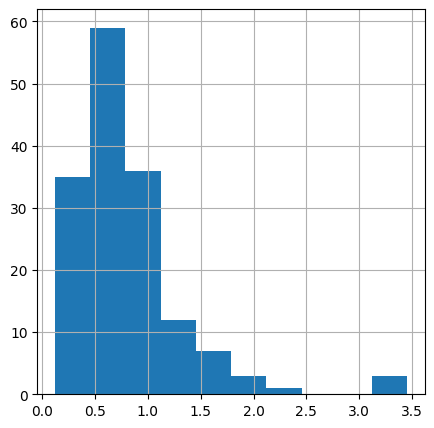

In [ ]:
covid_flu['lymphocytes'].map(np.log1p).hist(figsize=(5, 5))

<Axes: title={'center': 'Lymphocytes (Log Transformed)'}, ylabel='Frequency'>

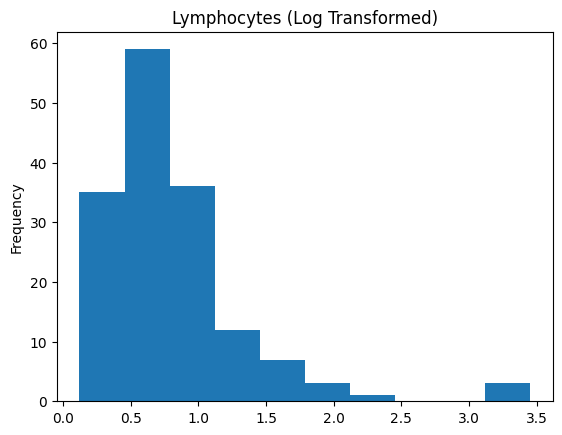

In [ ]:
covid_flu['lymphocytes'].map(np.log1p).plot(
    title='Lymphocytes (Log Transformed)', kind='hist', xlabel='cells/μL'
)

Our data look much more normal after applying the log transform (figure 3.7). However, we do have a way of taking this transformation even further, using another kind of feature transformation.

**B. BOX-COX TRANSFORMS**

A less common, b**ut oftentimes more useful transformation**, is the Box-Cox transformation. The Box-Cox transformation is a transformation parameterized by a parameter lambda that will shift the shape of our data to be more normal.

For our purposes, we can use the **PowerTransformer class** in **scikit-learn** to perform the Box-Cox transformation

In [ ]:
covid_flu['Age'].min()

0.0

In [ ]:
# looks like Age may have some 0s in it which won't work with Box-Cox
covid_flu[covid_flu['Age']==0].head(3)

,Diagnosis,InitialPCRDiagnosis,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue,Female
726,H1N1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"asthma, respiratory disease",NaN,True,True,True,NaN,True,False,NaN,NaN,False
727,H1N1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,True,NaN,False,False,NaN,NaN,True
728,H1N1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,NaN,True,False,NaN,NaN,True


In [ ]:
covid_flu['Age'] = covid_flu['Age'] + 0.01  # to make Age strictly positive

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'neutrophil'}>],
       [<Axes: title={'center': 'serumLevelsOfWhiteBloodCell'}>,
        <Axes: title={'center': 'lymphocytes'}>],
       [<Axes: title={'center': 'DurationOfIllness'}>,
        <Axes: title={'center': 'Temperature'}>]], dtype=object)

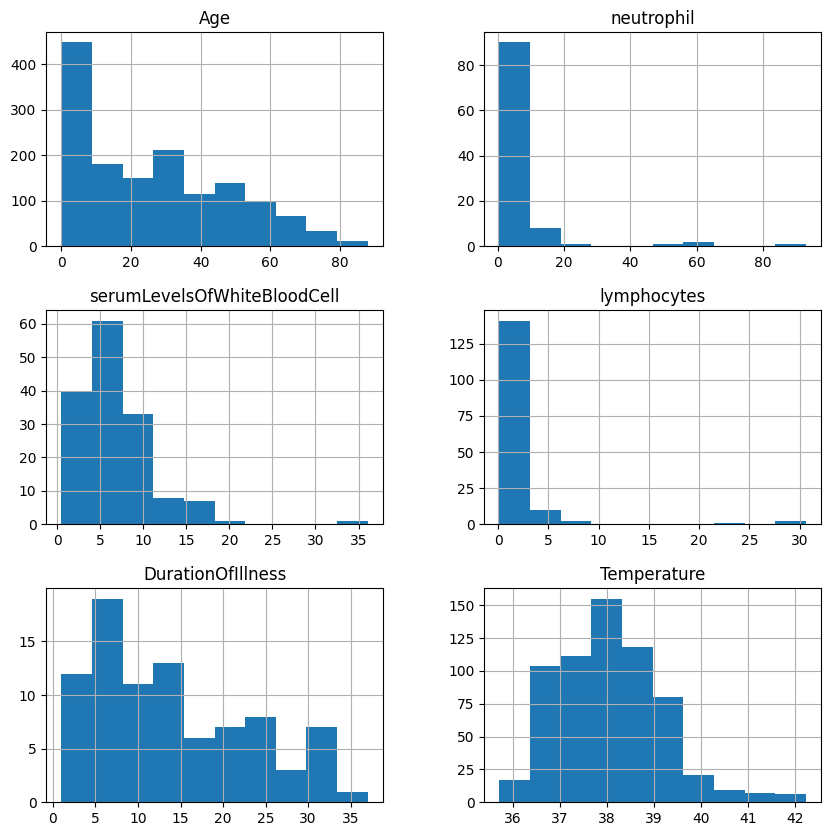

In [ ]:
from sklearn.preprocessing import PowerTransformer

boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)
pd.DataFrame(covid_flu[numerical_columns]).hist(figsize=(10, 10)) # histograms before the box-cox transformation


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'neutrophil'}>],
       [<Axes: title={'center': 'serumLevelsOfWhiteBloodCell'}>,
        <Axes: title={'center': 'lymphocytes'}>],
       [<Axes: title={'center': 'DurationOfIllness'}>,
        <Axes: title={'center': 'Temperature'}>]], dtype=object)

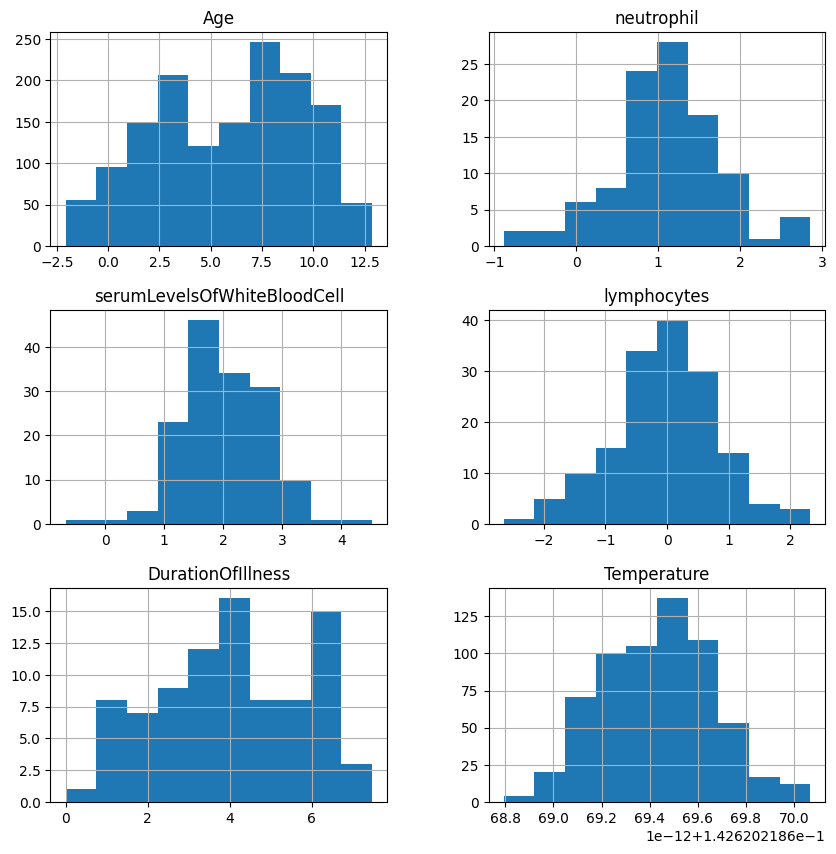

In [ ]:
pd.DataFrame(
    boxcox_transformer.fit_transform(covid_flu[numerical_columns]),
    columns=numerical_columns
).hist(figsize=(10, 10)) # histograms after the box-cox transformation

In [ ]:
boxcox_transformer.lambdas_

array([ 0.41035252, -0.22261792,  0.12473207, -0.24415703,  0.36376995,
       -7.01162857])

The formula for Box-Cox is as follows:

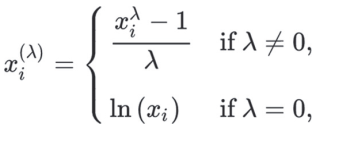

A lambda value of 1 would not change the shape of our distribution, so if we see a value very close to 1, our data were already close to normally distributed.

**C. NORMALIZING NEGATIVE DATA**

The PowerTransformer class also supports the **Yeo-Johnson transformation**, which also attempts to distort distributions to be more normal but has a modification in it that allows it to be utilized on negative data. Our data do not have any negatives in them, so we did not need to use it.

Feature transformations seem like they are a great catchall for forcing our data to be normal, but there are disadvantages to using the log and Box-Cox transformations:

---
1. We are distorting the original variable distribution, which may lead to
decreased performance.

---
2. We are also changing various statistical measures, including the covariance
between variables. This may become an issue when relying on techniques that
use the covariance, like PCA.

---
3. Transformations run the risk of hiding outliers in our data, which may sound
good at first but means that we lose control over dealing with outliers manually
if we rely entirely on these transformations.




We will be applying the Box-Cox transformation later in this chapter in our feature engineering. In general, if the goal is to enforce normally distributed data, I recommend using the Box-Cox transformation, as the log transform is a special case of the Box-Cox transformation-

**D. FEATURE SCALING**

In most datasets with numerical features, we run into the issue that the scales of the data are vastly different from one another, and some scales are just too big to be efficient. This can be an issue for algorithms where the distance between points is important, like in k-nearest neighbors (k-NN), k-means, or algorithms that rely on a gradient descent, like neural networks and SVMs

Moving forward, we will talk about two kinds of standardization: min-max standardization and z-score standardization. **Min-max standardization** scales values in a feature to be between 0 and 1, while **z-score** standardization scales values to have a mean of 0 and a variance of 1, allowing for negative values. While min-max standardization ensures that each feature is on the same scale (from 0 to 1), z-score standardization ensures that outliers are handled more properly but will not guarantee that the data will end up on the exact same scale.

Both transformations do not affect the distribution of the feature like the log and Box-Cox transformations, and they both help deal with the effects of outliers on our models. Min-max standardization has a harder time dealing with outliers, so if our data have many outliers, it is generally better to stick with z-score standardization.

In [ ]:
covid_flu[numerical_columns].describe()

,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,DurationOfIllness,Temperature
count,1454.000000,103.000000,151.000000,156.000000,87.000000,628.000000
mean,26.481040,6.854078,6.885159,1.850154,13.988506,38.068312
std,21.487982,12.690131,4.346668,3.956668,9.043171,1.094468
min,0.010000,0.446000,0.500000,0.130000,1.000000,35.722222
25%,7.010000,2.160000,3.995000,0.637500,7.000000,37.222222
50%,24.010000,3.310000,5.690000,0.905500,12.000000,38.000000
75%,42.010000,6.645000,9.155000,1.605000,20.000000,38.722222
max,88.010000,93.000000,36.070000,30.600000,37.000000,42.222222


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'neutrophil'}>],
       [<Axes: title={'center': 'serumLevelsOfWhiteBloodCell'}>,
        <Axes: title={'center': 'lymphocytes'}>],
       [<Axes: title={'center': 'DurationOfIllness'}>,
        <Axes: title={'center': 'Temperature'}>]], dtype=object)

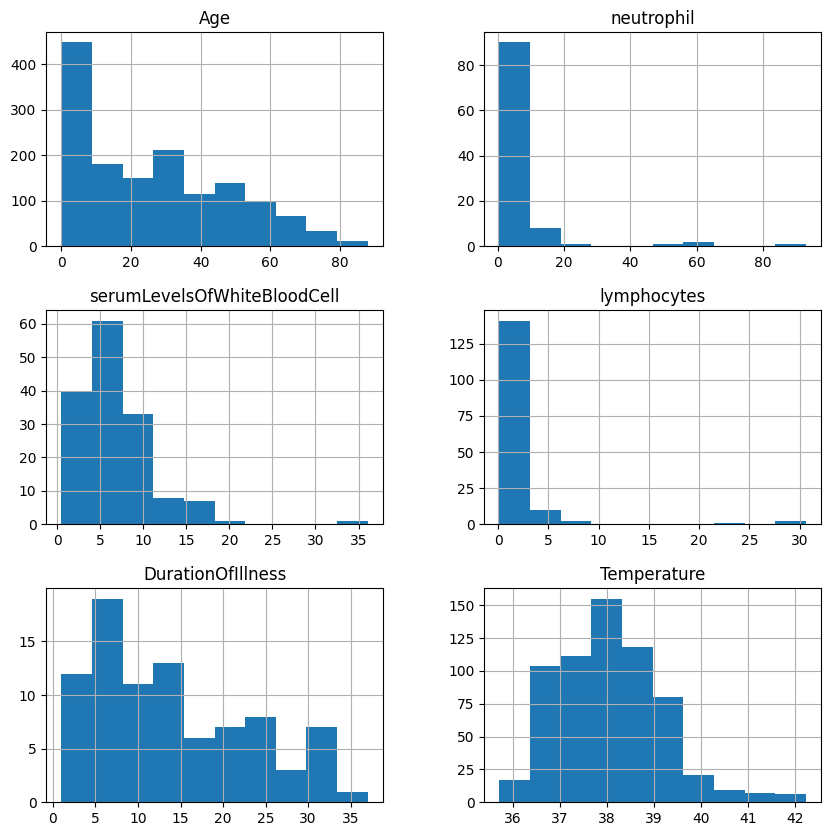

In [ ]:
covid_flu[numerical_columns].hist(figsize=(10, 10))

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'neutrophil'}>],
       [<Axes: title={'center': 'serumLevelsOfWhiteBloodCell'}>,
        <Axes: title={'center': 'lymphocytes'}>],
       [<Axes: title={'center': 'DurationOfIllness'}>,
        <Axes: title={'center': 'Temperature'}>]], dtype=object)

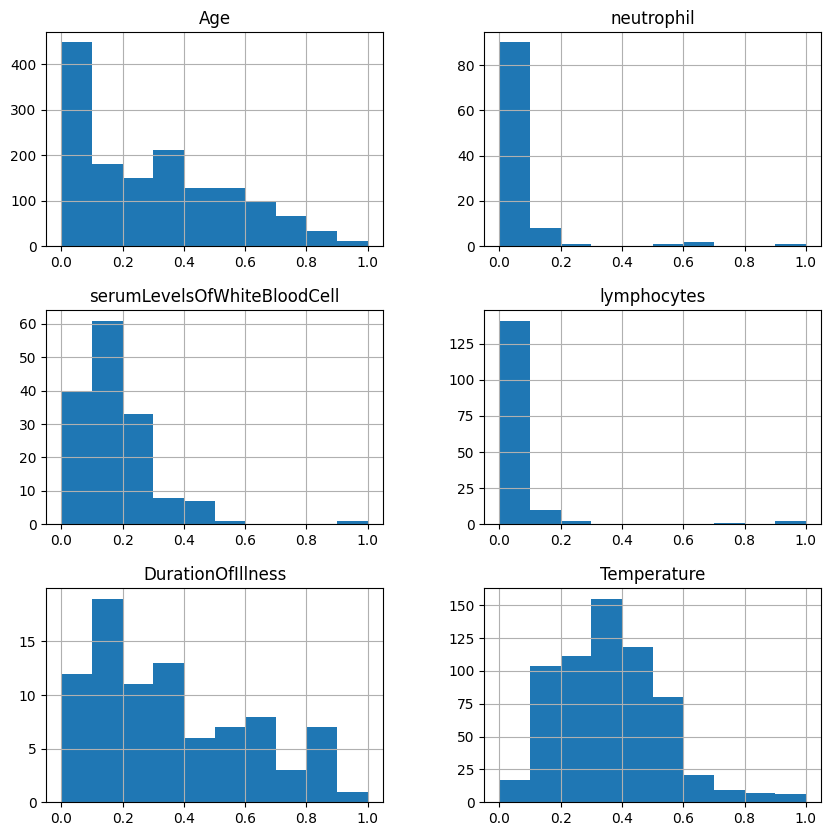

In [ ]:
from sklearn.preprocessing import MinMaxScaler
pd.DataFrame(  # mean of 0 and std of 1 but ranges are different (see min and max)
    MinMaxScaler().fit_transform(covid_flu[numerical_columns]),
    columns=numerical_columns
).hist(figsize=(10, 10))

In [ ]:
from sklearn.preprocessing import StandardScaler

pd.DataFrame(  # mean of 0 and std of 1 but ranges are different (see min and max)
    StandardScaler().fit_transform(covid_flu[numerical_columns]),
    columns=numerical_columns
).describe()

,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,DurationOfIllness,Temperature
count,1.454000e+03,103.000000,1.510000e+02,1.560000e+02,8.700000e+01,6.280000e+02
mean,1.368308e-16,0.000000,-1.411674e-16,-1.708035e-17,-5.614921e-17,1.708471e-15
std,1.000344e+00,1.004890,1.003328e+00,1.003221e+00,1.005797e+00,1.000797e+00
min,-1.232324e+00,-0.507435,-1.473866e+00,-4.361482e-01,-1.444604e+00,-2.145299e+00
25%,-9.064480e-01,-0.371709,-6.671264e-01,-3.074706e-01,-7.772737e-01,-7.736770e-01
50%,-1.150359e-01,-0.280644,-2.758748e-01,-2.395187e-01,-2.211651e-01,-6.246559e-02
75%,7.229298e-01,-0.016556,5.239403e-01,-6.215921e-02,6.686088e-01,5.979450e-01
max,2.864398e+00,6.821614,6.736646e+00,7.289577e+00,2.559378e+00,3.798396e+00


We can see that all features now have a mean of 0 and a standard deviation (and therefore variance) of 1., but the ranges are different if we look at the min and max of the features

In [ ]:
pd.DataFrame(  # mean and std are different but min and max are 0s and 1s
    MinMaxScaler().fit_transform(covid_flu[numerical_columns]),
    columns=numerical_columns
).describe()

,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,DurationOfIllness,Temperature
count,1454.000000,103.000000,151.000000,156.000000,87.000000,628.000000
mean,0.300807,0.069236,0.179510,0.056454,0.360792,0.360937
std,0.244182,0.137111,0.122200,0.129855,0.251199,0.168380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.079545,0.018519,0.098257,0.016656,0.166667,0.230769
50%,0.272727,0.030944,0.145909,0.025451,0.305556,0.350427
75%,0.477273,0.066977,0.243323,0.048408,0.527778,0.461538
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now, our scales are spot on with all features having a min of 0 and a max of 1, but our standard deviations and means are no longer identical.

**CONSTRUCTING CATEGORICAL DATA**

In [ ]:
categorical_types = ['O']  # Just the "object" type

categorical_columns = covid_flu.select_dtypes(include=categorical_types).columns.tolist()

categorical_columns.remove('Diagnosis')  # our response variable

for categorical_column in categorical_columns:
    print('=======')
    print(categorical_column)
    print('=======')
    print(covid_flu[categorical_column].value_counts(dropna=False))


InitialPCRDiagnosis
NaN      1378
True      100
False       4
Name: InitialPCRDiagnosis, dtype: int64
CReactiveProteinLevels
NaN           1345
8                3
0.5              3
15               3
111              2
              ... 
5.78             1
67.62            1
13.2 mg/dL       1
21.27            1
0.6              1
Name: CReactiveProteinLevels, Length: 121, dtype: int64
CTscanResults
NaN      1323
True      144
False      15
Name: CTscanResults, dtype: int64
RiskFactors
NaN                                                                   1273
asthma                                                                  36
pneumonia                                                               21
immuno                                                                  21
diabetes                                                                16
                                                                      ... 
diabetes, Hypertension                                    

In [ ]:
#covid_flu['Female'] = covid_flu['Sex'] == 'F'
#del covid_flu['Sex']

In [ ]:
#covid_flu = covid_flu.replace({'Yes': True, 'No': False})  # replace yes and  no with True / False

covid_flu.head(3)

,Diagnosis,InitialPCRDiagnosis,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue,Female
0,H1N1,NaN,67.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN,False,NaN,38.111111,False,True
1,H1N1,NaN,29.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,H1N1,NaN,22.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [ ]:
# construct a new categorical column that is an amalgamation of several flu symptoms
covid_flu['FluSymptoms'] = covid_flu[['Diarrhea', 'Fever', 'Coughing', 'SoreThroat', 'NauseaVomitting', 'Fatigue']].sum(axis=1) >= 2

print(covid_flu['FluSymptoms'].value_counts())

print(covid_flu['FluSymptoms'].isnull().sum())  # no missing values

binary_features = [  # aggregate all binary columns in a list
    'Female', 'GroundGlassOpacity', 'CTscanResults', 'Diarrhea', 'Fever', 'FluSymptoms',
    'Coughing', 'SoreThroat', 'NauseaVomitting', 'Fatigue', 'InitialPCRDiagnosis'
]

False    753
True     729
Name: FluSymptoms, dtype: int64
0


In [ ]:
covid_flu['FluSymptoms'] = covid_flu[['Diarrhea', 'Fever', 'Coughing', 'SoreThroat', 'NauseaVomitting', 'Fatigue']].sum(axis=1) >= 1

print(covid_flu['FluSymptoms'].value_counts())

True     930
False    552
Name: FluSymptoms, dtype: int64


In [ ]:
# A custom data transformer to deal with our messy risk factor column

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MultiLabelBinarizer  # class to help make dummy variables
from functools import reduce

class DummifyRiskFactor(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.label_binarizer = None

    def parse_risk_factors(self, comma_sep_factors):
        ''' asthma,heart disease -> ['asthma', 'heart disease'] '''
        try:
            return [s.strip().lower() for s in comma_sep_factors.split(',')]
        except:
            return []

    def fit(self, X, y=None):
        self.label_binarizer = MultiLabelBinarizer()
        self.label_binarizer.fit(X.apply(self.parse_risk_factors))  # create dummy variable for each risk factor
        return self

    def transform(self, X, y=None):
        return self.label_binarizer.transform(X.apply(self.parse_risk_factors))

In [ ]:
drf = DummifyRiskFactor()

risks = drf.fit_transform(covid_flu['RiskFactors'])

print(risks.shape)

pd.DataFrame(risks, columns=drf.label_binarizer.classes_)

(1482, 41)


,asthma,athero,atopic dermatitis and repetitive respiratory infections,begin tumor (removed),chronic,chronic endrocrine disorder,chronic liver dieseas,chronic liver disorder,chronic neurological disorders,chronic obstructive pulmonary disease,...,lung disease,myxoma of abdominal cavity,obesity,pneumomediastinum and subcutaneous emphysema,pneumonia,pre-eclampsia,prom,renal disease,respiratory disease,rheumatoid arthritis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1480,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X, y = covid_flu.drop(['Diagnosis'], axis=1), covid_flu['Diagnosis']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0, test_size=.2
)

In [ ]:
y_train.value_counts(normalize=True)

H1N1       0.723207
COVID19    0.276793
Name: Diagnosis, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

H1N1       0.723906
COVID19    0.276094
Name: Diagnosis, dtype: float64

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

# deal with risk factors

risk_factor_pipeline = Pipeline(
    [
        ('select_risk_factor', FunctionTransformer(lambda df: df['RiskFactors'])),
        ('dummify', DummifyRiskFactor())
    ]
)

# deal with binary columns

binary_pipeline = Pipeline(
    [
        ('select_categorical_features', FunctionTransformer(lambda df: df[binary_features])),
        ('fillna', SimpleImputer(strategy='constant', fill_value=False))  # assume missing values are not present
    ]
)

# deal with numerical columns

numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
        ('impute', SimpleImputer(strategy='median')),
    ]
)

ALGORITMO

In [ ]:
def simple_grid_search(x_train, y_train, x_test, y_test, feature_engineering_pipeline):
    '''
    simple helper function to grid search an ExtraTreesClassifier model and
    print out a classification report for the best param set.
    Best here is defined as having the best cross-validated accuracy on the training set
    '''

    params = {  # some simple parameters to grid search
        'max_depth': [10, None],
        'n_estimators': [10, 50, 100, 500],
        'criterion': ['gini', 'entropy']
    }

    base_model = ExtraTreesClassifier()

    model_grid_search = GridSearchCV(base_model, param_grid=params, cv=3)
    start_time = time.time()  # capture the start time
    if feature_engineering_pipeline:  # fit FE pipeline to training data and use it to transform test data
        parsed_x_train = feature_engineering_pipeline.fit_transform(x_train, y_train)
        parsed_x_test = feature_engineering_pipeline.transform(x_test)
    else:
        parsed_x_train = x_train
        parsed_x_test = x_test

    parse_time = time.time()
    print(f"Parsing took {(parse_time - start_time):.2f} seconds")

    model_grid_search.fit(parsed_x_train, y_train)
    fit_time = time.time()
    print(f"Training took {(fit_time - start_time):.2f} seconds")

    best_model = model_grid_search.best_estimator_

    print(classification_report(y_true=y_test, y_pred=best_model.predict(parsed_x_test)))
    end_time = time.time()
    print(f"Overall took {(end_time - start_time):.2f} seconds")

    return best_model

In [ ]:
# only using numerical values has a good precision on COVID class but awful recall.
simple_grid_search(x_train, y_train, x_test, y_test, numerical_pipeline)

Parsing took 0.01 seconds
Training took 16.57 seconds
              precision    recall  f1-score   support

     COVID19       0.78      0.72      0.75        82
        H1N1       0.90      0.92      0.91       215

    accuracy                           0.87       297
   macro avg       0.84      0.82      0.83       297
weighted avg       0.86      0.87      0.86       297

Overall took 16.64 seconds


ExtraTreesClassifier(criterion='entropy', n_estimators=500)

In [ ]:
# only using risk factors has a horrible recall and accuracy is barely higher than the null accuracy
simple_grid_search(x_train, y_train, x_test, y_test, risk_factor_pipeline)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['atopic dermatitis and repetitive respiratory infections', 'begin tumor (removed)', 'chronic liver disorder', 'chronic neurological disorders', 'fatty liver', 'hypertention', 'lung disease', 'pneumomediastinum and subcutaneous emphysema', 'rheumatoid arthritis'] will be ignored
  warnings.warn(


Parsing took 0.01 seconds
Training took 13.07 seconds
              precision    recall  f1-score   support

     COVID19       0.80      0.10      0.17        82
        H1N1       0.74      0.99      0.85       215

    accuracy                           0.74       297
   macro avg       0.77      0.54      0.51       297
weighted avg       0.76      0.74      0.66       297

Overall took 13.09 seconds


ExtraTreesClassifier(n_estimators=50)

In [ ]:
# only using binary columns is also not performing well
simple_grid_search(x_train, y_train, x_test, y_test, binary_pipeline)

Parsing took 0.02 seconds
Training took 15.58 seconds
              precision    recall  f1-score   support

     COVID19       0.82      0.60      0.69        82
        H1N1       0.86      0.95      0.90       215

    accuracy                           0.85       297
   macro avg       0.84      0.77      0.80       297
weighted avg       0.85      0.85      0.84       297

Overall took 15.62 seconds


ExtraTreesClassifier(criterion='entropy', max_depth=10)

In [ ]:
# Use our cross-validation function to show the best classification report (best == highest test set accuracy)
# We  will use this as a baseline performance indicator for our next feature engineering attempts

simple_fe = FeatureUnion([  # put all of our features together
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

simple_fe.fit_transform(x_train, y_train).shape

best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 0.02 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['atopic dermatitis and repetitive respiratory infections', 'begin tumor (removed)', 'chronic liver disorder', 'chronic neurological disorders', 'fatty liver', 'hypertention', 'lung disease', 'pneumomediastinum and subcutaneous emphysema', 'rheumatoid arthritis'] will be ignored
  warnings.warn(


Training took 15.32 seconds
              precision    recall  f1-score   support

     COVID19       0.84      0.84      0.84        82
        H1N1       0.94      0.94      0.94       215

    accuracy                           0.91       297
   macro avg       0.89      0.89      0.89       297
weighted avg       0.91      0.91      0.91       297

Overall took 15.35 seconds


In [ ]:
numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
        ('impute', SimpleImputer(strategy='mean')),  # try mean instead of median
        ('scale', StandardScaler())  # scale our numerical features
    ]
)

simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

# gained some precision for the COVID class
best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 0.04 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['atopic dermatitis and repetitive respiratory infections', 'begin tumor (removed)', 'chronic liver disorder', 'chronic neurological disorders', 'fatty liver', 'hypertention', 'lung disease', 'pneumomediastinum and subcutaneous emphysema', 'rheumatoid arthritis'] will be ignored
  warnings.warn(


Training took 16.77 seconds
              precision    recall  f1-score   support

     COVID19       0.86      0.85      0.86        82
        H1N1       0.94      0.95      0.95       215

    accuracy                           0.92       297
   macro avg       0.90      0.90      0.90       297
weighted avg       0.92      0.92      0.92       297

Overall took 16.80 seconds


In [ ]:
# Apply box-cox transformation after scaling data and impute using gaussian end of tail

numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
        ('box-cox', PowerTransformer(method='box-cox', standardize=True)),
        ('turn_into_df', FunctionTransformer(lambda matrix: pd.DataFrame(matrix))),  # turn back into dataframe
        ('end_of_tail', EndTailImputer(imputation_method='gaussian'))

    ]
)

simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

# looking better
best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 0.05 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['atopic dermatitis and repetitive respiratory infections', 'begin tumor (removed)', 'chronic liver disorder', 'chronic neurological disorders', 'fatty liver', 'hypertention', 'lung disease', 'pneumomediastinum and subcutaneous emphysema', 'rheumatoid arthritis'] will be ignored
  warnings.warn(


Training took 14.74 seconds
              precision    recall  f1-score   support

     COVID19       0.81      0.88      0.84        82
        H1N1       0.95      0.92      0.94       215

    accuracy                           0.91       297
   macro avg       0.88      0.90      0.89       297
weighted avg       0.91      0.91      0.91       297

Overall took 14.77 seconds
